# **Energy Consumption Forecasting**

### **Importing the Libraries**

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore")

## **Data Preprocessing**

### **Importing the Dataset**

In [113]:
data_2015_2023 = pd.read_csv("./Dataset/AP/2015-2023_data.csv")
data_ashish = pd.read_csv("./Dataset/AP/ashish.csv")
data_final = pd.read_csv("./Dataset/AP/finalAPData.csv")

In [114]:
data_2015_2023.head()

,Unnamed: 0,Date,Energy Required (MU),temp,rain
0,0,2015-01-01,131.501,28.0,0.1
1,1,2015-01-02,135.684,28.0,0.4
2,2,2015-01-03,136.575,27.0,1.1
3,3,2015-01-04,136.887,27.0,0.4
4,4,2015-01-05,138.566,27.0,0.0


In [115]:
data_ashish.head()

,Date,temp,rain,inflation,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday,1D,Main,Sub,Energy Required (MU)
0,2015-01-01,28.0,0.1,0.052,0,0,0,1,0,0,0,0,0,131.501
1,2015-01-02,28.0,0.4,0.052,1,0,0,0,0,0,0,0,0,135.684
2,2015-01-03,27.0,1.1,0.052,0,1,0,0,0,0,0,0,0,136.575
3,2015-01-04,27.0,0.4,0.052,0,0,1,0,0,0,0,0,0,136.887
4,2015-01-05,27.0,0.0,0.052,0,0,0,0,0,0,0,0,0,138.566


In [116]:
data_final.head()

,Date,Energy Required (MU),temp,rain,inflation,day,Holiday
0,2015-01-01,131.501,28.0,0.1,0.052,Thursday,Work
1,2015-01-02,135.684,28.0,0.4,0.052,Friday,Work
2,2015-01-03,136.575,27.0,1.1,0.052,Saturday,Work
3,2015-01-04,136.887,27.0,0.4,0.052,Sunday,Work
4,2015-01-05,138.566,27.0,0.0,0.052,Monday,Work


##### Among the three datasets, the data_final dataset has the best feature for my project's energy consumption forecasting.

In [117]:
data_final.shape

(3015, 7)

In [118]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015 entries, 0 to 3014
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  3015 non-null   object 
 1   Energy Required (MU)  3015 non-null   float64
 2   temp                  3015 non-null   float64
 3   rain                  3015 non-null   float64
 4   inflation             3015 non-null   float64
 5   day                   3015 non-null   object 
 6   Holiday               3015 non-null   object 
dtypes: float64(4), object(3)
memory usage: 165.0+ KB


In [119]:
data_final['Date'] = pd.to_datetime(data_final['Date'])

In [120]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015 entries, 0 to 3014
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  3015 non-null   datetime64[ns]
 1   Energy Required (MU)  3015 non-null   float64       
 2   temp                  3015 non-null   float64       
 3   rain                  3015 non-null   float64       
 4   inflation             3015 non-null   float64       
 5   day                   3015 non-null   object        
 6   Holiday               3015 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 165.0+ KB


In [121]:
data_final['Day_of_Week'] = data_final['Date'].dt.dayofweek

In [122]:
data_final['Month'] = data_final['Date'].dt.month

In [123]:
data_final['Year'] = data_final['Date'].dt.year

In [124]:
#Seasons Taken as per Andhra Pradesh
def get_season(month):
    if month in [10, 11, 12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5, 6]:
        return 1  # Summer
    else:
        return 2  # Rainy

In [125]:
data_final['Season'] = data_final['Month'].apply(get_season)

In [126]:
data_final['Holiday'].unique() # Checking the holiday event names

array(['Work', 'Pongal', 'Republic Day', 'Maha Shivaratri', 'Holi',
       'Ugadi', 'Annul Closing of Accounts Day', 'Good Friday',
       'Dr Ambedkar Jayanti', 'Idul Fitr', 'Independence Day',
       'Ganesh Chaturthi', 'Bakrid / Eid al Adha', 'Gandhi Jayanti',
       'Maha Ashtami', 'Vijaya Dashami', 'Muharram', 'Diwali',
       'Eid e Milad', 'Christmas Day', 'Kanuma Panduga',
       'Babu Jagjivan Ram Jayanti', 'Ram Navami', 'Janmashtami',
       'Makar Sankranti'], dtype=object)

In [127]:
data_final

,Date,Energy Required (MU),temp,rain,inflation,day,Holiday,Day_of_Week,Month,Year,Season
0,2015-01-01,131.501,28.000000,0.100000,0.052,Thursday,Work,3,1,2015,0
1,2015-01-02,135.684,28.000000,0.400000,0.052,Friday,Work,4,1,2015,0
2,2015-01-03,136.575,27.000000,1.100000,0.052,Saturday,Work,5,1,2015,0
3,2015-01-04,136.887,27.000000,0.400000,0.052,Sunday,Work,6,1,2015,0
4,2015-01-05,138.566,27.000000,0.000000,0.052,Monday,Work,0,1,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
3010,2023-05-10,218.349,37.245505,0.293171,0.043,Wednesday,Work,2,5,2023,1
3011,2023-05-11,219.604,37.272888,0.000000,0.043,Thursday,Work,3,5,2023,1
3012,2023-05-12,224.523,38.218507,0.814892,0.043,Friday,Work,4,5,2023,1
3013,2023-05-13,224.030,38.145824,0.000000,0.043,Saturday,Work,5,5,2023,1


In [128]:
holidays = ['Pongal', 'Republic Day', 'Maha Shivaratri', 'Holi','Ugadi', 'Annul Closing of Accounts Day', 'Good Friday','Dr Ambedkar Jayanti',
            'Idul Fitr','Independence Day','Ganesh Chaturthi', 'Bakrid / Eid al Adha', 'Gandhi Jayanti', 'Maha Ashtami', 'Vijaya Dashami', 'Muharram',
            'Diwali','Eid e Milad', 'Christmas Day', 'Kanuma Panduga', 'Babu Jagjivan Ram Jayanti', 'Ram Navami', 'Janmashtami','Makar Sankranti']

In [129]:
data_final['Is_Holiday'] = data_final['Holiday'].apply(lambda x: 1 if x in holidays else 0)

In [130]:
data_final.columns

Index(['Date', 'Energy Required (MU)', 'temp', 'rain', 'inflation', 'day',
       'Holiday', 'Day_of_Week', 'Month', 'Year', 'Season', 'Is_Holiday'],
      dtype='object')

In [131]:
final_data = data_final.drop(columns=['Date','day', 'Holiday']) # Dropping the columns

In [132]:
final_data.head()

,Energy Required (MU),temp,rain,inflation,Day_of_Week,Month,Year,Season,Is_Holiday
0,131.501,28.0,0.1,0.052,3,1,2015,0,0
1,135.684,28.0,0.4,0.052,4,1,2015,0,0
2,136.575,27.0,1.1,0.052,5,1,2015,0,0
3,136.887,27.0,0.4,0.052,6,1,2015,0,0
4,138.566,27.0,0.0,0.052,0,1,2015,0,0


In [133]:
final_data.describe()

,Energy Required (MU),temp,rain,inflation,Day_of_Week,Month,Year,Season,Is_Holiday
count,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.00000,3015.000000
mean,168.280759,32.057764,2.115455,0.049590,3.007297,6.367828,2018.729685,0.81990,0.058043
std,24.878503,3.601448,4.661772,0.014704,1.998991,3.486683,2.422706,0.79297,0.233864
min,96.640000,20.000000,0.000000,0.015000,0.000000,1.000000,2015.000000,0.00000,0.000000
25%,150.712500,29.620017,0.000000,0.037000,1.000000,3.000000,2017.000000,0.00000,0.000000
50%,164.864000,32.000000,0.100000,0.050000,3.000000,6.000000,2019.000000,1.00000,0.000000
75%,184.668000,34.558081,2.208547,0.060500,5.000000,9.000000,2021.000000,1.00000,0.000000
max,247.822000,43.000000,68.126267,0.078000,6.000000,12.000000,2023.000000,2.00000,1.000000


## **Data Visualization**

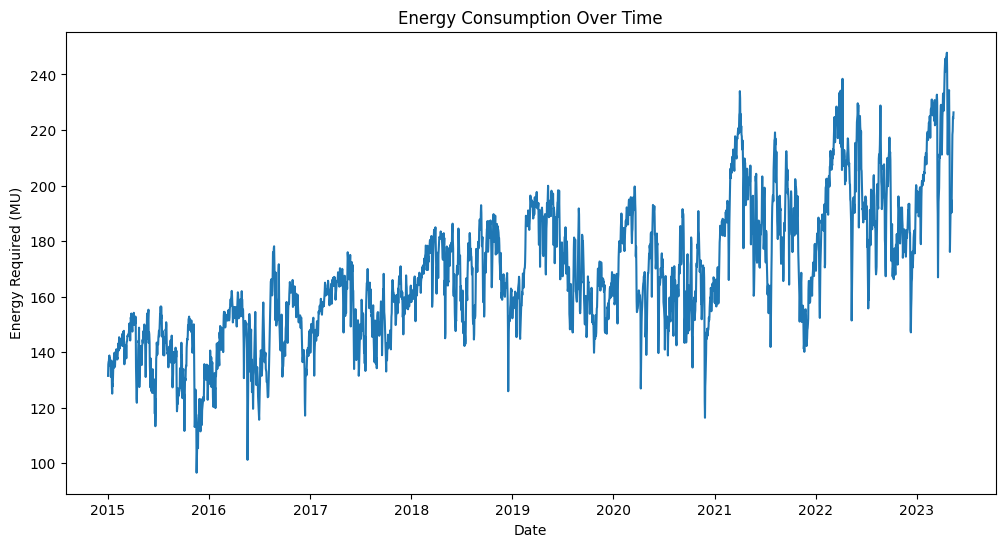

In [134]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Energy Required (MU)', data=data_final)
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Required (MU)')
plt.show()

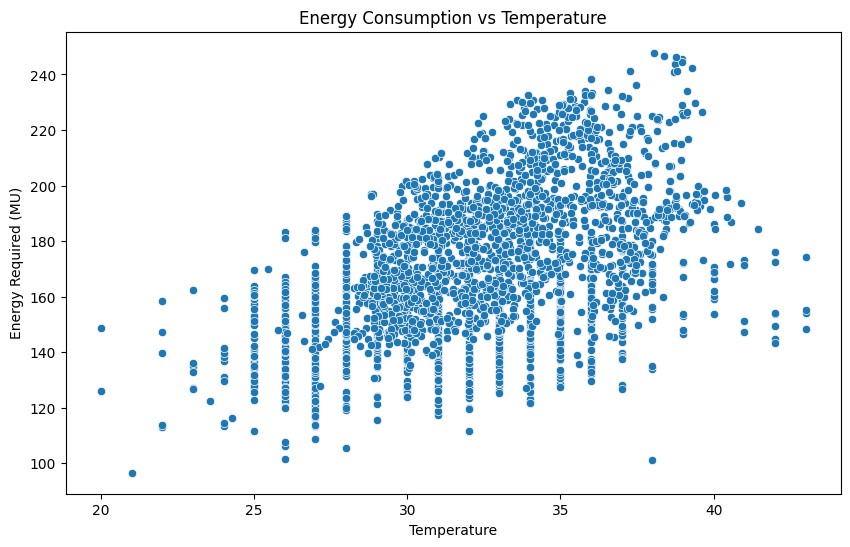

In [135]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='Energy Required (MU)', data=data_final)
plt.title('Energy Consumption vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Energy Required (MU)')
plt.show()

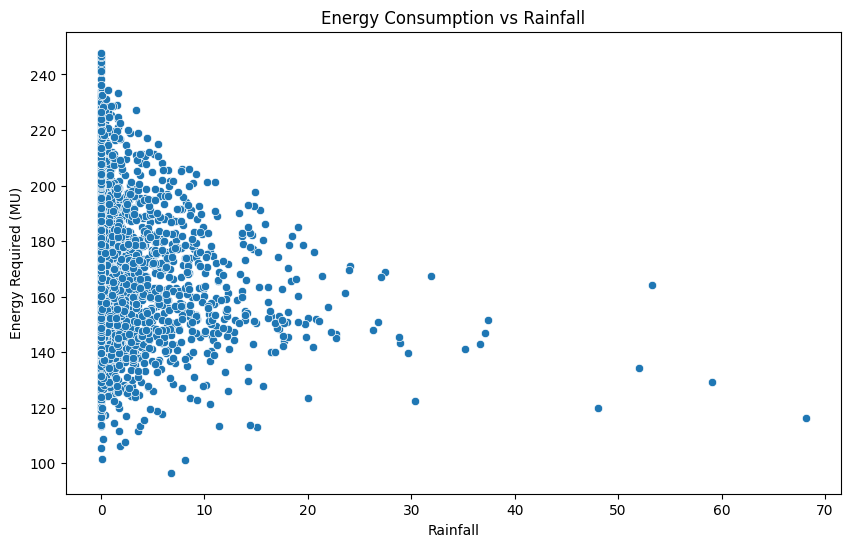

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rain', y='Energy Required (MU)', data=data_final)
plt.title('Energy Consumption vs Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Energy Required (MU)')
plt.show()

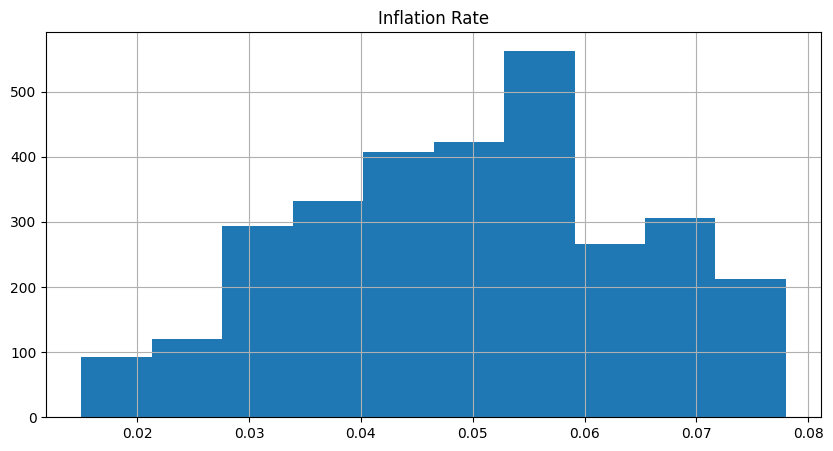

In [137]:
final_data['inflation'].hist(figsize=(10,5))
plt.title('Inflation Rate')
plt.show()

### **Splitting the dataset into the Training set and Test set**

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X = final_data.drop(columns = ['Energy Required (MU)'])
y = final_data['Energy Required (MU)']

In [140]:
X.head()

,temp,rain,inflation,Day_of_Week,Month,Year,Season,Is_Holiday
0,28.0,0.1,0.052,3,1,2015,0,0
1,28.0,0.4,0.052,4,1,2015,0,0
2,27.0,1.1,0.052,5,1,2015,0,0
3,27.0,0.4,0.052,6,1,2015,0,0
4,27.0,0.0,0.052,0,1,2015,0,0


In [141]:
y.head()

0    131.501
1    135.684
2    136.575
3    136.887
4    138.566
Name: Energy Required (MU), dtype: float64

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

# **Model - 1**

### **Training the Linear Regression model on the whole dataset**

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [145]:
y_lin = lin_reg.predict(X_test)

### **Checking for Model Accuracy**

In [146]:
from sklearn.metrics import mean_squared_error, r2_score

In [147]:
mse_lin = mean_squared_error(y_test, y_lin)
print("Mean Squared Error:", mse_lin)

Mean Squared Error: 153.00238227873928


In [148]:
r2_lin = r2_score(y_test, y_lin)
print("R-squared (R2) Score:", r2_lin)

R-squared (R2) Score: 0.7533992597292076


### **Predicting a new result with Linear Regression**

In [149]:
user_input = [[42,0,0.054,1,6,2024,1,1]]
lin_reg.predict(user_input)

array([228.12113673])

# **Model - 2**

### **Training the Random Forest Regression model on the whole dataset**

In [150]:
from sklearn.ensemble import RandomForestRegressor

In [151]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [152]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [153]:
y_pred = rf_reg.predict(X_test)

### **Checking for Model Accuracy**

In [154]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 59.19752572828895


In [155]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.9045887165325278


### **Predicting a new result with Random Forest Regression**

In [156]:
user_input = [[42,0,0.054,1,6,2024,1,1]]
rf_reg.predict(user_input)

array([224.03913])

# **Model - 3**

### **Training the Decision Tree Regression model on the whole dataset**

In [157]:
from sklearn.tree import DecisionTreeRegressor

In [158]:
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [159]:
y_dt = dt_reg.predict(X_test)

### **Checking for Model Accuracy**

In [160]:
mse_dt = mean_squared_error(y_test, y_dt)
print("Mean Squared Error:", mse_dt)

Mean Squared Error: 102.56133117351105


In [161]:
r2_dt = r2_score(y_test, y_dt)
print("R-squared (R2) Score:", r2_dt)

R-squared (R2) Score: 0.8346973438330563


### **Predicting a new result with Random Forest Regression**

In [162]:
user_input = [[42,0,0.054,1,6,2024,1,1]]
dt_reg.predict(user_input)

array([225.299])

# **Model - 4**

### **Training the Support Vector Regressor model on the whole dataset**

In [163]:
from sklearn.svm import SVR

In [164]:
sv_reg = SVR(kernel = 'rbf')

### **Feature Scaling**

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [167]:
sv_reg.fit(X_train_scaler, y_train)

SVR()

In [168]:
y_svr = sv_reg.predict(X_test_scaler)

### **Checking for Model Accuracy**

In [169]:
mse_svr = mean_squared_error(y_test, y_svr)
print("Mean Squared Error:", mse_svr)

Mean Squared Error: 158.79847077989518


In [170]:
r2_svr = r2_score(y_test, y_svr)
print("R-squared (R2) Score:", r2_svr)

R-squared (R2) Score: 0.744057446263479


### **Predicting a new result with Support Vector Regression**

In [171]:
user_input = [[42,0,0.054,1,6,2024,1,1]]
scaled_input = scaler.transform(user_input)
regressor.predict(scaled_input)

array([173.55452438])

### **Saving the Best Model**

#### Among the four models, Random Forest Regressor is the best fit.

In [172]:
joblib.dump(rf_reg, 'energy_consumption_model.pkl')

['energy_consumption_model.pkl']